### Explore the primary chlorophyll max and perfrom linear regression

#### PCM was sliced in inidivual cast processing (23.3-24.4) and then refined by taking the CTD values for the chl fluorescence max within that range (between 49-64 m depth). For each cast, these were arranged in an Excel sheet. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import style
import datetime
from sklearn.linear_model import LinearRegression


import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [2]:
cd ~/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804/

/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804


In [3]:
p2_pcm = pd.read_csv("p2_2018_pcm_max.csv", parse_dates = ['StartTime'])

p2_pcm = p2_pcm.set_index('StartTime')

# rename oxygen so there's no backslash
p2_pcm.rename(columns = {'sbox0Mm/Kg':'sbox0MmKg'}, inplace = True)

p2_pcm.head()

,Cast,timeS,scan,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,...,par,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0MmKg,sbeox0PS,Time
StartTime,,,,,,,,,,,,,,,,,,,,,
2018-04-15 05:12:33,42,189.479,4549,-107.00064,16.90048,54,19.7534,19.7368,4.691735,4.690174,...,0.050671,1.4782,34.3634,34.3642,24.3433,24.3482,3.1076,94.807,41.676,2018-04-15 05:15:42.479000
2018-04-15 15:06:02,43,268.090,6435,-107.01706,16.91626,50,21.6910,21.6892,4.873075,4.872572,...,24.299000,2.2141,34.2604,34.2579,23.7445,23.7431,5.3448,163.154,74.194,2018-04-15 15:10:30.090000
2018-04-15 22:01:43,44,337.090,8091,-107.01527,16.92707,50,21.6301,21.6392,4.867970,4.868703,...,25.385000,2.2370,34.2686,34.2671,23.7675,23.7639,5.4468,166.263,75.531,2018-04-15 22:07:20.090000
2018-04-16 15:03:02,45,200.915,4823,-107.03420,16.94374,46,21.8995,21.8370,4.895800,4.888871,...,13.421000,2.3134,34.2751,34.2701,23.6974,23.7110,5.6759,173.269,79.090,2018-04-16 15:06:22.915000
2018-04-17 15:03:16,46,172.823,4149,-107.06272,16.97818,46,22.1115,22.0664,4.917841,4.912864,...,23.391000,2.3278,34.2803,34.2770,23.6424,23.6525,5.7391,175.208,80.276,2018-04-17 15:06:08.823000


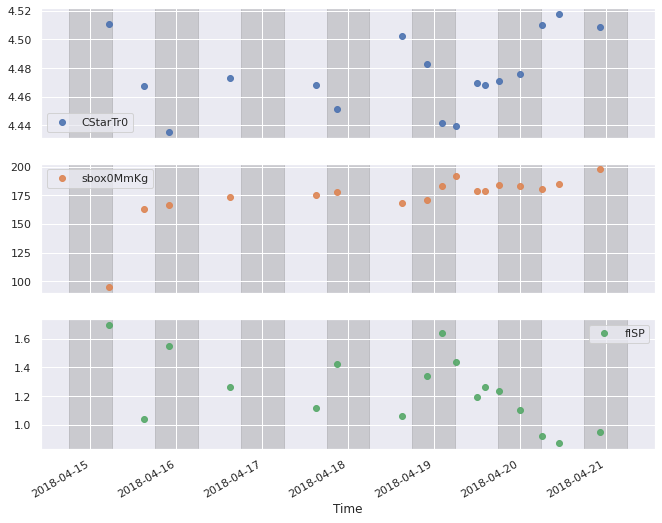

In [4]:
# Visualize the time series


# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Plot O2
cols_plot = ['CStarTr0', 'sbox0MmKg', 'flSP']

axes = p2_pcm[cols_plot].plot(marker='o', alpha=0.9, linestyle='None', figsize=(11, 9), subplots=True, \
                              sharex = True, sharey = False)
for ax in axes:
    ax.set_ylabel('')
    ax.set_xlabel('Time')
    
    
for ax in axes:
    ax.axvspan('2018-04-14 18-00-00','2018-04-15 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-15 18-00-00','2018-04-16 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-16 18-00-00','2018-04-17 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-17 18-00-00','2018-04-18 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .3, zorder = -1)

model = LinearRegression()
#model.fit('StartTime', 'CStarTr0')

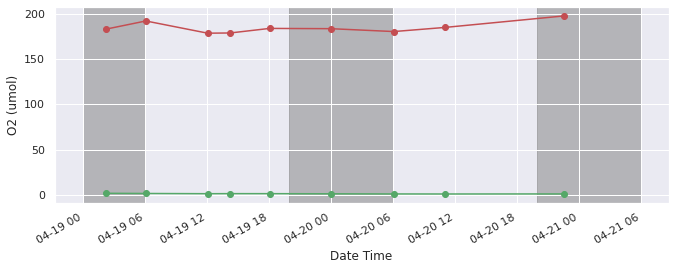

In [5]:
# Visualize the time series

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# reshape the data
x = p2_pcm.index.values.reshape(-1,1)
y = p2_pcm.sbox0MmKg.values.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

ax = p2_pcm.loc['2018-04-19':'2018-04-20', 'sbox0MmKg'].plot(marker='o', color = 'r', linestyle='-')
#ax = p2_pcm.loc['2018-04-19':'2018-04-20', 'CStarTr0'].plot(marker='o', color = 'b', linestyle='-')
ax = p2_pcm.loc['2018-04-19':'2018-04-20', 'flSP'].plot(marker='o', color = 'g', linestyle='-')

### Shade in sundown to sunup

# 20%-grey rectangle spanning the x axis width from the nighttime hours
ax.axvspan('2018-04-19 00-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 20-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 20-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

### Trying to get regression model plotted

#x_new = np.linspace('2018-04-23 00-00-00', '2018-04-23 06-00-00')
#y_new = model.predict(x_new[:, np.newaxis])

#print(regression.predict([[2018-4-22]]))

#x_new = 2018-4-22
#y_new = regression.predict([[2018-4-22]])
#y_new = 1.3

#ax.plot(x_new, y_new)

ax.set_xlabel('Date Time')
ax.set_ylabel('O2 (umol)')

ax.axis('tight')

plt.show()

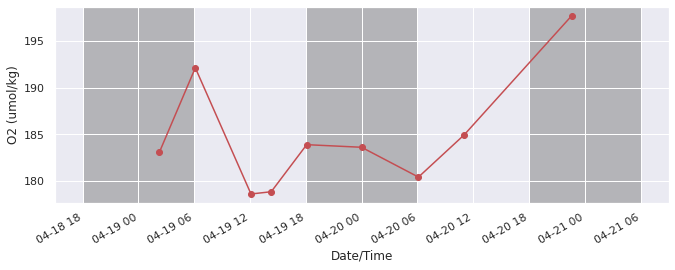

In [6]:
ax = p2_pcm.loc['2018-04-19':'2018-04-20', 'sbox0MmKg'].plot(marker='o', color = 'r', linestyle='-')

ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

ax.set_xlabel('Date/Time')
ax.set_ylabel('O2 (umol/kg)');